Statevector([ 0.06881308+0.07316354j,  0.03660471+0.17104727j,
             -0.00951422+0.08141106j, -0.36497363+0.15281173j,
             -0.09563991-0.19384088j,  0.68658938-0.02235881j,
             -0.18841057+0.49109763j,  0.02394955+0.01281192j],
            dims=(2, 2, 2))
[0.01008814 0.03059707 0.00671828 0.15655718 0.04672128 0.47190489
 0.27667543 0.00073773]


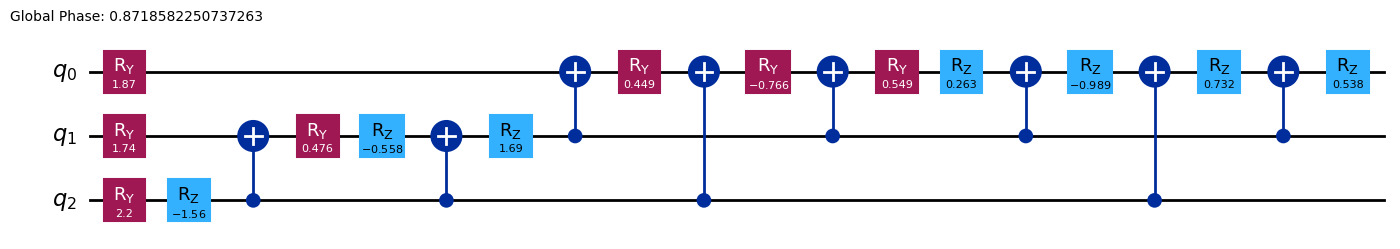

In [1]:
import qiskit
import qiskit.quantum_info
import numpy as np
import time
%load_ext autoreload
%autoreload 2
def transpiled_circuit(qc):
    qc = qiskit.transpile(qc, optimization_level = 2)
    return qc

def transpiled_circuit_clifford(qc):
    qc = qiskit.transpile(qc, 
        basis_gates=['h', 'cx', 's',
                    'rx','ry','rz'])
    return qc

def haar(num_qubits: int):
    """
    to generate random matrix for Haar measure
    see https://arxiv.org/pdf/math-ph/0609050.pdf
    """
    d = 2**num_qubits
    array = (np.random.randn(d,d) + 1j*np.random.randn(d,d))/np.sqrt(2.0)
    ortho,upper = np.linalg.qr(array)
    diag = np.diagonal(upper)
    temp = diag/np.absolute(diag)
    result = np.multiply(ortho,temp,ortho)
    basic_state = np.zeros(d)
    basic_state[0] = 1
    return result @ basic_state

num_qubits = 3
state = haar(num_qubits)
qc = qiskit.QuantumCircuit(num_qubits)
qc.prepare_state(state, list(range(0, num_qubits)))
qc_transpiled = transpiled_circuit_clifford(qc)
print(qiskit.quantum_info.Statevector.from_instruction(qc_transpiled))
print(qiskit.quantum_info.Statevector.from_instruction(qc).probabilities())
qc_transpiled.draw('mpl')

In [27]:
from problem import qrc
%load_ext autoreload
%autoreload 2
circuit = qrc.qrc_Qsun(3, 10)
circuit.visual_circuit()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
|Q_0> : x--------x-----x--RZ----------o--H--------S--------------RZ----H-----------H---M
        |        |     |              |                                                 
|Q_1> : ---S-----o-----o-----S--------x--------RX-------RZ-RZ-------------RZ-RZ--------M
        |                                                                               
|Q_2> : o-----RX----H-----------S--RZ-------RY-------RX-------RY----RY----------RX-----M
                                                                                        


In [44]:
circuit = qrc.qrc_ProjectQ(3, 10)
print(circuit)

(Note: This is the (slow) Python simulator.)
[0.0619007  0.01552986 0.55685441 0.13970558 0.0197759  0.00496145
 0.16090395 0.04036815]


C:\Users\haime\AppData\Local\Temp\ipykernel_26324\2584160052.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


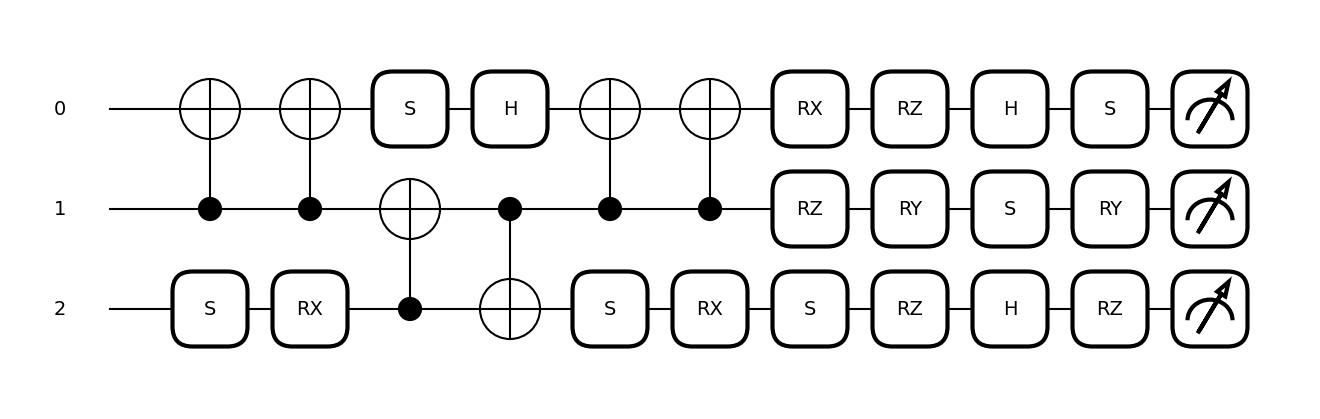

In [50]:
import pennylane as qml 
fig, ax = qml.draw_mpl(qrc.qrc_Pennylane)(3, 10)
fig.show()

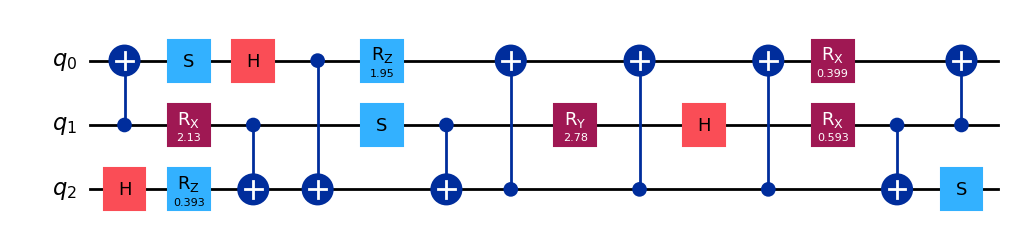

In [66]:
qc = qrc.qrc_Qiskit(3, 10)
qc.draw('mpl')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from problem import qrc
import time
%load_ext autoreload
%autoreload 2
num_qubits = 10
num_repeat = 2

import constant
import json
# ---- Benchamrking PSR on Qsun ----
timess = np.zeros((len(constant.packages), num_qubits))
funcs = [qrc.qrc_Qsun, qrc.qrc_ProjectQ, qrc.qrc_Qiskit, qrc.qrc_Pennylane]
for j, package in enumerate(constant.packages):
    print(f'-- Package: {package} --')
    for i in range(1, num_qubits + 1):
        print(f'-- # qubits: {i} --')
        times = []
        for _ in range(num_repeat):
            start = time.time()
            prob = funcs[j](i, 5)
            end = time.time()
            times.append(end-start)
        timess[j][i - 1] = np.mean(times)

data = {}
for j, package in enumerate(constant.packages):
    data[package] = list(timess[j])

with open('./time/qrc_cad102.json', 'w') as f:
    json.dump(data, f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-- Package: Qsun --
-- # qubits: 1 --
-- # qubits: 2 --
-- # qubits: 3 --
-- # qubits: 4 --
-- # qubits: 5 --
-- # qubits: 6 --
-- # qubits: 7 --
-- # qubits: 8 --
-- # qubits: 9 --
-- # qubits: 10 --
-- Package: ProjectQ --
-- # qubits: 1 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 2 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 3 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 4 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 5 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 6 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 7 --
(Note: This is the (s

In [15]:
timess

array([[0.        , 0.00049973, 0.00049984, 0.00100005, 0.00150037,
        0.00149965, 0.00349987, 0.00250018, 0.00700045, 0.06009269],
       [0.00049889, 0.00049806, 0.00100458, 0.00096583, 0.00199878,
        0.0024997 , 0.00550008, 0.01150012, 0.0285002 , 0.07999957],
       [0.00049973, 0.00050008, 0.00049973, 0.00050044, 0.00049996,
        0.00049961, 0.00099993, 0.00100005, 0.00050008, 0.00099993],
       [0.00100005, 0.00100017, 0.00149965, 0.00200033, 0.00199986,
        0.00250006, 0.00349998, 0.00349987, 0.00400007, 0.00399995]])

10
10
10
10


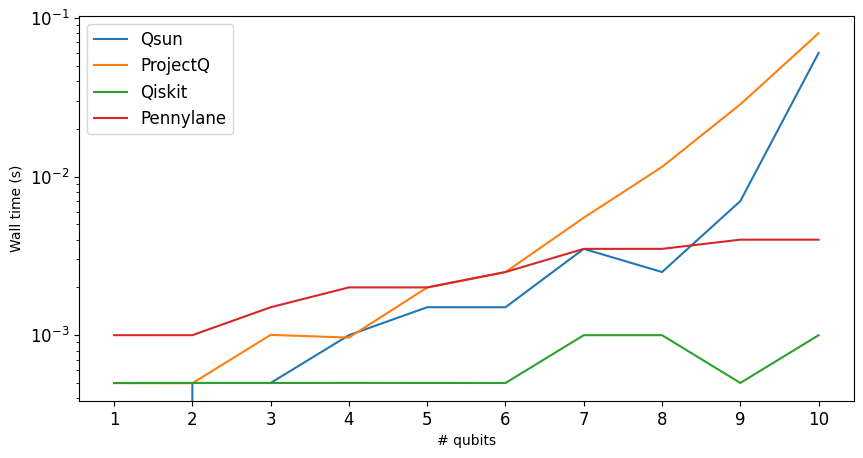

In [16]:
import matplotlib.pyplot as plt
packages = ['Qsun', 'ProjectQ', 'Qiskit', 'Pennylane']
plt.figure(figsize=(10, 5))
for j in range(len(timess)):
    print(len(timess[j]))
    plt.plot(range(1, num_qubits + 1), timess[j], label=packages[j]) 

plt.xticks(range(1, num_qubits + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')